In [30]:
import os
import gc
import sys
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random as rnd
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.models import Sequential, Model
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras import regularizers, optimizers
from sklearn.model_selection import train_test_split
from keras.applications.vgg19 import preprocess_input
from tensorflow.keras.optimizers import Adam, Adamax

In [31]:
folder_path = '/content/drive/MyDrive/dataSet/'
path_Ak = folder_path + 'Ak'
path_Ala_Idris = folder_path + 'Ala_Idris'
path_Buzgulu = folder_path + 'Buzgulu'
path_Dimnit = folder_path + 'Dimnit'
path_Nazli = folder_path + 'Nazli'

In [32]:
data_frame = pd.DataFrame()

In [33]:
data_frame['images'] = os.listdir(path_Ak)+os.listdir(path_Ala_Idris)+os.listdir(path_Buzgulu)+os.listdir(path_Dimnit)+os.listdir(path_Nazli)

In [34]:
data_frame

,images
0,Ak (1).png
1,Ak (10).png
2,Ak (6).png
3,Ak (12).png
4,Ak (3).png
...,...
495,Nazli (98).png
496,Nazli (97).png
497,Nazli (95).png
498,Nazli (96).png


In [35]:
type_lable = []
path = []
for image in data_frame['images']:
    classs = image.split(' (')[0]
    type_lable.append(classs)
    path.append(folder_path+classs+'/'+image)

In [36]:
data_frame['type_lable'] = type_lable 
data_frame['path'] = path
data_frame = data_frame[['type_lable','path']]

In [37]:
data_frame

,type_lable,path
0,Ak,/content/drive/MyDrive/dataSet/Ak/Ak (1).png
1,Ak,/content/drive/MyDrive/dataSet/Ak/Ak (10).png
2,Ak,/content/drive/MyDrive/dataSet/Ak/Ak (6).png
3,Ak,/content/drive/MyDrive/dataSet/Ak/Ak (12).png
4,Ak,/content/drive/MyDrive/dataSet/Ak/Ak (3).png
...,...,...
495,Nazli,/content/drive/MyDrive/dataSet/Nazli/Nazli (98...
496,Nazli,/content/drive/MyDrive/dataSet/Nazli/Nazli (97...
497,Nazli,/content/drive/MyDrive/dataSet/Nazli/Nazli (95...
498,Nazli,/content/drive/MyDrive/dataSet/Nazli/Nazli (96...


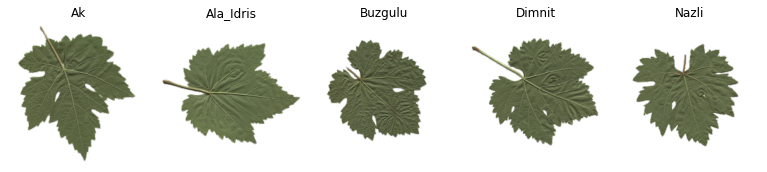

In [38]:
plt.figure(figsize = (15,15))
for idx,i in enumerate(data_frame.type_lable.unique()):
    plt.subplot(4,7,idx+1)
    df = data_frame[data_frame['type_lable'] ==i].reset_index(drop = True)
    image_path = df.loc[rnd.randint(0, len(df))-1,'path']
    img = Image.open(image_path)
    img = img.resize((225,225))
    plt.imshow(img)
    plt.axis('off')
    plt.title(i)
plt.tight_layout()
plt.show()

In [39]:
data_frame.isna().sum()

type_lable    0
path          0
dtype: int64

In [40]:
data_frame.describe()

,type_lable,path
count,500,500
unique,5,500
top,Ak,/content/drive/MyDrive/dataSet/Ak/Ak (1).png
freq,100,1


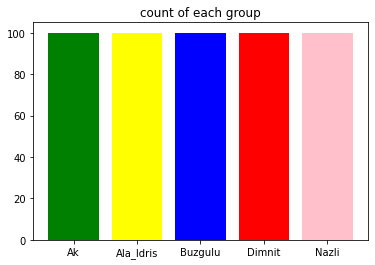

In [41]:
left = [1, 2, 3, 4, 5]
height = [sum(data_frame["type_lable"]=='Ak'), sum(data_frame["type_lable"]=='Ala_Idris'), sum(data_frame["type_lable"]=='Buzgulu'), sum(data_frame["type_lable"]=='Dimnit'), sum(data_frame["type_lable"]=='Nazli')]
tick_label = ['Ak', 'Ala_Idris', 'Buzgulu', 'Dimnit', 'Nazli']
plt.bar(left, height, tick_label = tick_label,width = 0.8, color = ['green','yellow','blue','red','pink'])
plt.title('count of each group')
plt.show()


In [42]:
date_frame_copy =  data_frame[['path']].copy()

In [43]:
x_train, x_test, y_train, y_test = train_test_split(date_frame_copy, data_frame['type_lable'] , test_size=0.2, random_state=42)

In [44]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [45]:
print("x_train shape is: {}".format(x_train.shape))
print("y_train shape is: {}".format(y_train.shape))
print("x_test shape is: {}".format(x_test.shape))
print("y_test shape is: {}".format(y_test.shape))
print("x_validation shape is: {}".format(x_validation.shape))
print("y_validation shape is: {}".format(y_validation.shape))

x_train shape is: (320, 1)
y_train shape is: (320,)
x_test shape is: (100, 1)
y_test shape is: (100,)
x_validation shape is: (80, 1)
y_validation shape is: (80,)


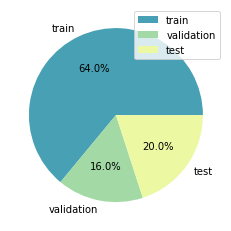

In [46]:
plt.pie([len(x_train),len(x_validation),len(x_test)], labels=['train','validation','test'],colors=['#47a0b3', '#a2d9a4', '#edf8a3'], autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.show()

In [47]:
train_data_set = pd.concat([x_train, y_train], axis=1)
validation_data_set = pd.concat([x_validation, y_validation], axis=1)
test_data_set = pd.concat([x_test, y_test], axis=1)

In [48]:
data_generator = ImageDataGenerator(rotation_range=90, brightness_range=[0.5,1.5], shear_range=0.45,
                             horizontal_flip=True, fill_mode='nearest',preprocessing_function=preprocess_input) 

In [49]:
test_data_generation = ImageDataGenerator(preprocessing_function=preprocess_input) 

In [50]:
train_generator= data_generator.flow_from_dataframe(train_data_set, x_col='path', y_col='type_lable',
                                             target_size=(227, 227),  batch_size=32, class_mode="categorical", shuffle=True)

Found 320 validated image filenames belonging to 5 classes.


In [51]:
validation_generator = data_generator.flow_from_dataframe(validation_data_set,  x_col='path', y_col='type_lable', target_size=(227, 227),
                                                          batch_size=32, class_mode="categorical", shuffle=True)


Found 80 validated image filenames belonging to 5 classes.


In [52]:
test_generator = test_data_generation.flow_from_dataframe(test_data_set, x_col='path', y_col='type_lable',
                                                          target_size=(227, 227),  batch_size=32, class_mode="categorical", shuffle=False )

Found 100 validated image filenames belonging to 5 classes.


#### auto encoder

In [ ]:
col_count = 227*227
input_dim = Input(shape = (col_count, ))

# Encoder Layers
encoded1 = Dense(3000, activation = 'relu')(input_dim)
encoded2 = Dense(2750, activation = 'relu')(encoded1)
encoded3 = Dense(2500, activation = 'relu')(encoded2)
encoded4 = Dense(2250, activation = 'relu')(encoded3)
encoded5 = Dense(2000, activation = 'relu')(encoded4)
encoded6 = Dense(1750, activation = 'relu')(encoded5)
encoded7 = Dense(1500, activation = 'relu')(encoded6)
encoded8 = Dense(1250, activation = 'relu')(encoded7)
encoded9 = Dense(1000, activation = 'relu')(encoded8)
encoded10 = Dense(750, activation = 'relu')(encoded9)
encoded11 = Dense(500, activation = 'relu')(encoded10)
encoded12 = Dense(250, activation = 'relu')(encoded11)
encoded13 = Dense(200, activation = 'relu')(encoded12)

# Decoder Layers
decoded1 = Dense(250, activation = 'relu')(encoded13)
decoded2 = Dense(500, activation = 'relu')(decoded1)
decoded3 = Dense(750, activation = 'relu')(decoded2)
decoded4 = Dense(1000, activation = 'relu')(decoded3)
decoded5 = Dense(1250, activation = 'relu')(decoded4)
decoded6 = Dense(1500, activation = 'relu')(decoded5)
decoded7 = Dense(1750, activation = 'relu')(decoded6)
decoded8 = Dense(2000, activation = 'relu')(decoded7)
decoded9 = Dense(2250, activation = 'relu')(decoded8)
decoded10 = Dense(2500, activation = 'relu')(decoded9)
decoded11 = Dense(2750, activation = 'relu')(decoded10)
decoded12 = Dense(3000, activation = 'relu')(decoded11)
decoded13 = Dense(col_count, activation = 'sigmoid')(decoded12)

autoencoder = Model(inputs = input_dim, outputs = decoded13)
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')
autoencoder.summary()

In [ ]:
autoencoder.fit(X_train, X_train, nb_epoch = 10, batch_size = 32, shuffle = False, validation_data = (X_test, X_test))
encoder = Model(inputs = input_dim, outputs = encoded13)
encoded_input = Input(shape = (encoding_dim, ))

#encoded dimention reductioned data
encoded_train = pd.DataFrame(encoder.predict(train))
encoded_test = pd.DataFrame(encoder.predict(test))


#### Data Training

In [53]:
callbacks = [tf.keras.callbacks.ModelCheckpoint("save_model_xception.h5", save_best_only=True)]

In [27]:
DenseNet169 = tf.keras.applications.DenseNet169(include_top = False, input_shape = (227,227,3), weights = 'imagenet')
x = GlobalAveragePooling2D()(DenseNet169.output)
predictions = Dense(5, activation='softmax')(x)

model_DenseNet169 = Model(inputs = DenseNet169.input, outputs = predictions)
model_DenseNet169.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history_DenseNet169 = model_DenseNet169.fit(
      train_generator ,
      validation_data = validation_generator,
      epochs=50 ,
      verbose=2 ,
      callbacks = callbacks)

Epoch 1/50
10/10 - 108s - loss: 1.1214 - accuracy: 0.5156 - val_loss: 1.7188 - val_accuracy: 0.2625 - 108s/epoch - 11s/step
Epoch 2/50
10/10 - 12s - loss: 0.5128 - accuracy: 0.8000 - val_loss: 2.1542 - val_accuracy: 0.3125 - 12s/epoch - 1s/step
Epoch 3/50
10/10 - 12s - loss: 0.3519 - accuracy: 0.8781 - val_loss: 1.9861 - val_accuracy: 0.3750 - 12s/epoch - 1s/step
Epoch 4/50
10/10 - 13s - loss: 0.2497 - accuracy: 0.9281 - val_loss: 1.6588 - val_accuracy: 0.4875 - 13s/epoch - 1s/step
Epoch 5/50
10/10 - 13s - loss: 0.2243 - accuracy: 0.9219 - val_loss: 1.3764 - val_accuracy: 0.5125 - 13s/epoch - 1s/step
Epoch 6/50
10/10 - 14s - loss: 0.1138 - accuracy: 0.9531 - val_loss: 1.3474 - val_accuracy: 0.6250 - 14s/epoch - 1s/step
Epoch 7/50
10/10 - 13s - loss: 0.1016 - accuracy: 0.9656 - val_loss: 1.1714 - val_accuracy: 0.7250 - 13s/epoch - 1s/step
Epoch 8/50
10/10 - 14s - loss: 0.1047 - accuracy: 0.9719 - val_loss: 0.7319 - val_accuracy: 0.7625 - 14s/epoch - 1s/step
Epoch 9/50
10/10 - 13s - loss

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def report_results(model, y_true, y_predicted):
    y_predicted = np.argmax(y_predicted, axis=1)
    labels = (train_generator.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    y_predicted = np.array([labels[k] for k in y_predicted])
    print(f"Accuracy score: {accuracy_score(y_true, y_predicted)}")
    print(classification_report(y_true, y_predicted))
    mat = confusion_matrix(y_true, y_predicted)
    sns.heatmap(mat, annot=True, cmap='Spectral')

    classes=labels.values()
    length = len(classes)
    plt.xticks(np.arange(length)+.5, classes, rotation= 90)
    plt.yticks(np.arange(length)+.5, classes, rotation=0)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

Accuracy score: 0.92
              precision    recall  f1-score   support

          Ak       0.96      0.89      0.93        28
   Ala_Idris       1.00      0.86      0.92        14
     Buzgulu       0.71      1.00      0.83        10
      Dimnit       0.88      0.92      0.90        24
       Nazli       1.00      0.96      0.98        24

    accuracy                           0.92       100
   macro avg       0.91      0.93      0.91       100
weighted avg       0.93      0.92      0.92       100



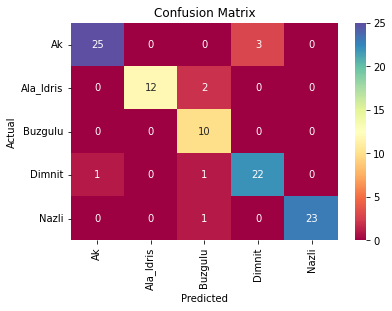

In [29]:
report_results(model_DenseNet169, y_test, model_DenseNet169.predict(test_generator))

In [54]:
EfficientNetB3 = tf.keras.applications.EfficientNetB3(include_top = False, input_shape = (227,227,3), weights = 'imagenet')
x = GlobalAveragePooling2D()(EfficientNetB3.output)
predictions = Dense(5, activation='softmax')(x)

model_EfficientNetB3 = Model(inputs = EfficientNetB3.input, outputs = predictions)
model_EfficientNetB3.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history_EfficientNetB3 = model_EfficientNetB3.fit(
      train_generator ,
      validation_data = validation_generator,
      epochs=50 ,
      verbose=2 ,
      callbacks = callbacks)

Epoch 1/50
10/10 - 40s - loss: 1.0422 - accuracy: 0.6125 - val_loss: 1.8172 - val_accuracy: 0.3125 - 40s/epoch - 4s/step
Epoch 2/50
10/10 - 13s - loss: 0.5622 - accuracy: 0.7875 - val_loss: 1.6201 - val_accuracy: 0.4375 - 13s/epoch - 1s/step
Epoch 3/50
10/10 - 13s - loss: 0.3343 - accuracy: 0.9156 - val_loss: 1.4448 - val_accuracy: 0.5375 - 13s/epoch - 1s/step
Epoch 4/50
10/10 - 13s - loss: 0.1770 - accuracy: 0.9375 - val_loss: 1.1110 - val_accuracy: 0.5625 - 13s/epoch - 1s/step
Epoch 5/50
10/10 - 13s - loss: 0.1731 - accuracy: 0.9469 - val_loss: 0.5185 - val_accuracy: 0.7750 - 13s/epoch - 1s/step
Epoch 6/50
10/10 - 13s - loss: 0.1133 - accuracy: 0.9594 - val_loss: 0.4502 - val_accuracy: 0.8875 - 13s/epoch - 1s/step
Epoch 7/50
10/10 - 12s - loss: 0.1260 - accuracy: 0.9563 - val_loss: 0.5555 - val_accuracy: 0.8250 - 12s/epoch - 1s/step
Epoch 8/50
10/10 - 13s - loss: 0.1878 - accuracy: 0.9344 - val_loss: 0.4031 - val_accuracy: 0.8750 - 13s/epoch - 1s/step
Epoch 9/50
10/10 - 12s - loss: 0

Accuracy score: 0.97
              precision    recall  f1-score   support

          Ak       1.00      1.00      1.00        28
   Ala_Idris       1.00      0.93      0.96        14
     Buzgulu       0.90      0.90      0.90        10
      Dimnit       0.92      1.00      0.96        24
       Nazli       1.00      0.96      0.98        24

    accuracy                           0.97       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.97      0.97      0.97       100



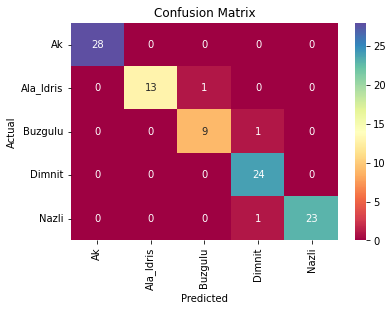

In [55]:
report_results(model_EfficientNetB3, y_test, model_EfficientNetB3.predict(test_generator))

In [57]:
ResNet50 = tf.keras.applications.ResNet50(include_top = False, input_shape = (227,227,3), weights = 'imagenet')
x = GlobalAveragePooling2D()(ResNet50.output)
predictions = Dense(5, activation='softmax')(x)
for layer in ResNet50.layers:
    layer.trainable = False
model_ResNet50 = Model(inputs = ResNet50.input, outputs = predictions)
model_ResNet50.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history_ResNet50 = model_ResNet50.fit(
      train_generator ,
      validation_data = validation_generator,
      epochs=50 ,
      verbose=2 ,
      callbacks = callbacks)

Epoch 1/50
10/10 - 25s - loss: 1.8040 - accuracy: 0.2000 - val_loss: 1.6678 - val_accuracy: 0.2000 - 25s/epoch - 2s/step
Epoch 2/50
10/10 - 10s - loss: 1.5922 - accuracy: 0.2656 - val_loss: 1.4804 - val_accuracy: 0.3500 - 10s/epoch - 1s/step
Epoch 3/50
10/10 - 9s - loss: 1.4811 - accuracy: 0.3719 - val_loss: 1.3478 - val_accuracy: 0.5250 - 9s/epoch - 858ms/step
Epoch 4/50
10/10 - 13s - loss: 1.4315 - accuracy: 0.3562 - val_loss: 1.3485 - val_accuracy: 0.5000 - 13s/epoch - 1s/step
Epoch 5/50
10/10 - 17s - loss: 1.3608 - accuracy: 0.4437 - val_loss: 1.3230 - val_accuracy: 0.4625 - 17s/epoch - 2s/step
Epoch 6/50
10/10 - 11s - loss: 1.2925 - accuracy: 0.5469 - val_loss: 1.2307 - val_accuracy: 0.6000 - 11s/epoch - 1s/step
Epoch 7/50
10/10 - 9s - loss: 1.2529 - accuracy: 0.5312 - val_loss: 1.1901 - val_accuracy: 0.6125 - 9s/epoch - 942ms/step
Epoch 8/50
10/10 - 11s - loss: 1.2311 - accuracy: 0.5969 - val_loss: 1.2228 - val_accuracy: 0.5750 - 11s/epoch - 1s/step
Epoch 9/50
10/10 - 9s - loss: 

Accuracy score: 0.82
              precision    recall  f1-score   support

          Ak       0.91      0.71      0.80        28
   Ala_Idris       0.71      0.86      0.77        14
     Buzgulu       0.59      1.00      0.74        10
      Dimnit       0.87      0.83      0.85        24
       Nazli       0.95      0.83      0.89        24

    accuracy                           0.82       100
   macro avg       0.81      0.85      0.81       100
weighted avg       0.85      0.82      0.82       100



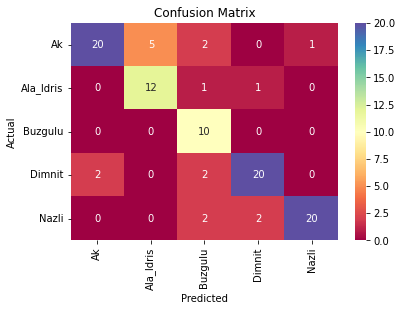

In [58]:
report_results(model_ResNet50, y_test, model_ResNet50.predict(test_generator))

In [59]:
EfficientNetB5 = tf.keras.applications.EfficientNetB5(include_top = False, input_shape = (227,227,3), weights = 'imagenet')
x = GlobalAveragePooling2D()(EfficientNetB5.output)
predictions = Dense(5, activation='softmax')(x)
for layer in EfficientNetB5.layers:
    layer.trainable = False
model_EfficientNetB5 = Model(inputs = EfficientNetB5.input, outputs = predictions)
model_EfficientNetB5.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history_EfficientNetB5 = model_EfficientNetB5.fit(
      train_generator ,
      validation_data = validation_generator,
      epochs=50 ,
      verbose=2 ,
      callbacks = callbacks)

115277824/115263384 [==============================] - 4s 0us/step
Epoch 1/50
10/10 - 31s - loss: 1.6483 - accuracy: 0.2125 - val_loss: 1.5190 - val_accuracy: 0.3750 - 31s/epoch - 3s/step
Epoch 2/50
10/10 - 10s - loss: 1.4794 - accuracy: 0.3719 - val_loss: 1.4110 - val_accuracy: 0.4875 - 10s/epoch - 990ms/step
Epoch 3/50
10/10 - 10s - loss: 1.3913 - accuracy: 0.5000 - val_loss: 1.3206 - val_accuracy: 0.5500 - 10s/epoch - 1s/step
Epoch 4/50
10/10 - 10s - loss: 1.3143 - accuracy: 0.5188 - val_loss: 1.2992 - val_accuracy: 0.5500 - 10s/epoch - 999ms/step
Epoch 5/50
10/10 - 10s - loss: 1.2823 - accuracy: 0.5250 - val_loss: 1.2500 - val_accuracy: 0.5375 - 10s/epoch - 1s/step
Epoch 6/50
10/10 - 10s - loss: 1.2270 - accuracy: 0.6156 - val_loss: 1.1937 - val_accuracy: 0.6500 - 10s/epoch - 1s/step
Epoch 7/50
10/10 - 10s - loss: 1.1935 - accuracy: 0.6062 - val_loss: 1.1425 - val_accuracy: 0.6750 - 10s/epoch - 1s/step
Epoch 8/50
10/10 - 10s - loss: 1.1687 - accuracy: 0.5781 - val_loss: 1.1520 - va

Accuracy score: 0.73
              precision    recall  f1-score   support

          Ak       0.82      0.64      0.72        28
   Ala_Idris       0.52      0.86      0.65        14
     Buzgulu       0.78      0.70      0.74        10
      Dimnit       0.76      0.67      0.71        24
       Nazli       0.80      0.83      0.82        24

    accuracy                           0.73       100
   macro avg       0.74      0.74      0.73       100
weighted avg       0.75      0.73      0.73       100



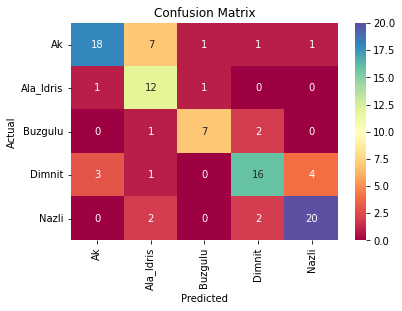

In [62]:
report_results(model_EfficientNetB5, y_test, model_EfficientNetB5.predict(test_generator))

In [63]:
vgg19 = tf.keras.applications.VGG19(include_top = False, input_shape = (227,227,3), weights = 'imagenet')
x = GlobalAveragePooling2D()(vgg19.output)
predictions = Dense(5, activation='softmax')(x)

for layer in vgg19.layers:layer.trainable = False

model_vgg19 = Model(inputs = vgg19.input, outputs = predictions)
model_vgg19.compile(loss='categorical_crossentropy', metrics=['accuracy'])
history_vgg19 = model_vgg19.fit(
      train_generator ,
      validation_data = validation_generator,
      epochs=40 ,
      verbose=2 ,
      callbacks = callbacks)

80150528/80134624 [==============================] - 1s 0us/step
Epoch 1/40
10/10 - 24s - loss: 94.3069 - accuracy: 0.1844 - val_loss: 1.6110 - val_accuracy: 0.1750 - 24s/epoch - 2s/step
Epoch 2/40
10/10 - 14s - loss: 1.6127 - accuracy: 0.2156 - val_loss: 1.6094 - val_accuracy: 0.2000 - 14s/epoch - 1s/step
Epoch 3/40
10/10 - 12s - loss: 1.6094 - accuracy: 0.2125 - val_loss: 1.6093 - val_accuracy: 0.2000 - 12s/epoch - 1s/step
Epoch 4/40
10/10 - 11s - loss: 1.6094 - accuracy: 0.2188 - val_loss: 1.6093 - val_accuracy: 0.1875 - 11s/epoch - 1s/step
Epoch 5/40
10/10 - 17s - loss: 1.6255 - accuracy: 0.2156 - val_loss: 1.6093 - val_accuracy: 0.2000 - 17s/epoch - 2s/step
Epoch 6/40
10/10 - 12s - loss: 1.6118 - accuracy: 0.2188 - val_loss: 1.6092 - val_accuracy: 0.2000 - 12s/epoch - 1s/step
Epoch 7/40
10/10 - 13s - loss: 1.6126 - accuracy: 0.2188 - val_loss: 1.6092 - val_accuracy: 0.2000 - 13s/epoch - 1s/step
Epoch 8/40
10/10 - 11s - loss: 1.6093 - accuracy: 0.2188 - val_loss: 1.6092 - val_accur

Accuracy score: 0.14
              precision    recall  f1-score   support

          Ak       0.00      0.00      0.00        28
   Ala_Idris       0.14      1.00      0.25        14
     Buzgulu       0.00      0.00      0.00        10
      Dimnit       0.00      0.00      0.00        24
       Nazli       0.00      0.00      0.00        24

    accuracy                           0.14       100
   macro avg       0.03      0.20      0.05       100
weighted avg       0.02      0.14      0.03       100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


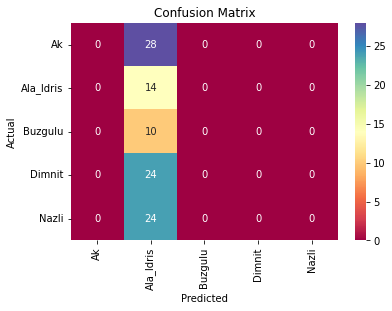

In [64]:
report_results(model_vgg19, y_test, model_vgg19.predict(test_generator))

In [65]:
xception = tf.keras.applications.Xception(include_top = False, input_shape = (227,227,3), weights = 'imagenet')
x = GlobalAveragePooling2D()(xception.output)
predictions = Dense(5, activation='softmax')(x)

model_xception = Model(inputs = xception.input, outputs = predictions)
model_xception.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history_xception = model_xception.fit(
      train_generator ,
      validation_data = validation_generator,
      epochs=40 ,
      verbose=2 ,
      callbacks = callbacks)

83697664/83683744 [==============================] - 2s 0us/step
Epoch 1/40
10/10 - 25s - loss: 1.0799 - accuracy: 0.5844 - val_loss: 4.6415 - val_accuracy: 0.1625 - 25s/epoch - 2s/step
Epoch 2/40
10/10 - 11s - loss: 0.5455 - accuracy: 0.7812 - val_loss: 9.3602 - val_accuracy: 0.2125 - 11s/epoch - 1s/step
Epoch 3/40
10/10 - 12s - loss: 0.2988 - accuracy: 0.9000 - val_loss: 5.4406 - val_accuracy: 0.4875 - 12s/epoch - 1s/step
Epoch 4/40
10/10 - 12s - loss: 0.2028 - accuracy: 0.9250 - val_loss: 3.9163 - val_accuracy: 0.4750 - 12s/epoch - 1s/step
Epoch 5/40
10/10 - 15s - loss: 0.1611 - accuracy: 0.9469 - val_loss: 4.3031 - val_accuracy: 0.4625 - 15s/epoch - 1s/step
Epoch 6/40
10/10 - 15s - loss: 0.1223 - accuracy: 0.9594 - val_loss: 4.2454 - val_accuracy: 0.5000 - 15s/epoch - 2s/step
Epoch 7/40
10/10 - 11s - loss: 0.2081 - accuracy: 0.9281 - val_loss: 3.3138 - val_accuracy: 0.5250 - 11s/epoch - 1s/step
Epoch 8/40
10/10 - 11s - loss: 0.0907 - accuracy: 0.9625 - val_loss: 3.6993 - val_accura

Accuracy score: 0.93
              precision    recall  f1-score   support

          Ak       1.00      0.89      0.94        28
   Ala_Idris       1.00      1.00      1.00        14
     Buzgulu       1.00      0.80      0.89        10
      Dimnit       0.77      1.00      0.87        24
       Nazli       1.00      0.92      0.96        24

    accuracy                           0.93       100
   macro avg       0.95      0.92      0.93       100
weighted avg       0.95      0.93      0.93       100



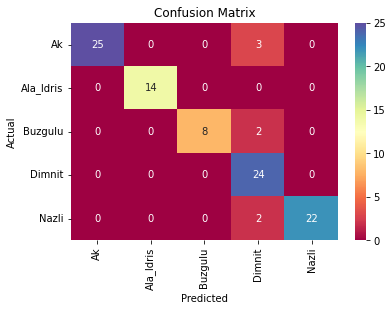

In [66]:
report_results(model_xception, y_test, model_xception.predict(test_generator))

### try on diffrent seeds

In [ ]:
def generate_data():
  inputs = {'x_col':'path','y_col':'label','target_size':(227, 227),'batch_size':32,'class_mode':"categorical",'shuffle':False}
  train= data_generator.flow_from_dataframe(pd.concat([x_train,y_train],axis=1),**inputs)
  valid= data_generator.flow_from_dataframe(pd.concat([x_valid,y_valid],axis=1),**inputs)
  test = test_data_generation.flow_from_dataframe(pd.concat([x_test,y_test],axis=1), **inputs)
  return train,valid,test

In [ ]:
preds_ENB3 = []
for i in range(10):
  x_train, x_test, y_train, y_test = train_test_split(date_frame_copy, data_frame['type_lable'] , test_size=0.2, random_state=i*10)
  x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=i)
  train,valid,test = generate_data()
  
  EfficientNetB3 = tf.keras.applications.EfficientNetB3(include_top = False, input_shape = (227,227,3), weights = 'imagenet')
  x = GlobalAveragePooling2D()(EfficientNetB3.output)
  predictions = Dense(5, activation='softmax')(x)

  model_EfficientNetB3 = Model(inputs = EfficientNetB3.input, outputs = predictions)
  model_EfficientNetB3.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  history_EfficientNetB3 = model_EfficientNetB3.fit(
        train_generator ,
        validation_data = validation_generator,
        epochs=25 ,
        verbose=0 ,
        callbacks = callbacks)

  pred = model_EfficientNetB3.evaluate(test)
  preds_ENB3.append(pred[1])

In [ ]:
preds_RN50 = []
for i in range(10):
  x_train, x_test, y_train, y_test = train_test_split(date_frame_copy, data_frame['type_lable'] , test_size=0.2, random_state=i*10)
  x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=i)
  train,valid,test = generate_data()
  
  ResNet50 = tf.keras.applications.ResNet50(include_top = False, input_shape = (227,227,3), weights = 'imagenet')
  x = GlobalAveragePooling2D()(ResNet50.output)
  predictions = Dense(5, activation='softmax')(x)
  for layer in ResNet50.layers:
      layer.trainable = False
  model_ResNet50 = Model(inputs = ResNet50.input, outputs = predictions)
  model_ResNet50.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  history_ResNet50 = model_ResNet50.fit(
        train_generator ,
        validation_data = validation_generator,
        epochs=25 ,
        verbose=2 ,
        callbacks = callbacks)

  pred = model_EfficientNetB3.evaluate(test)
  preds_RN50.append(pred[1])

mean of ENB3:89.90875735131752
mean of RN50:78.12538819964377


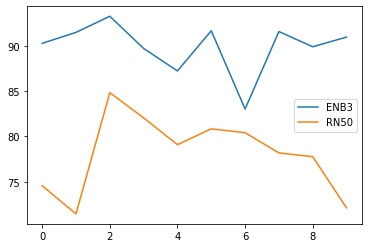

In [82]:
pd.DataFrame({'ENB3':preds_ENB3, 'RN50':preds_RN50}).plot()
print(f'mean of ENB3:{np.mean(preds_ENB3)}\nmean of RN50:{np.mean(preds_RN50)}')

### 10fold cross validation

In [88]:
preds_ENB3 = []
for i in range(10):
  x_train, x_test, y_train, y_test = train_test_split(date_frame_copy, data_frame['type_lable'],
                                                      test_size=0.2, random_state=50)
  x_valid, x_train, y_valid, y_train = (x_train.iloc[i*40:i*40+40],pd.concat([x_train.iloc[0:i*40],x_train.iloc[i*40+40:]]),
                                       y_train.iloc[i*40:i*40+40],pd.concat([y_train.iloc[0:i*40],y_train.iloc[i*40+40:]]))
  train,valid,test = generate_data()

  EfficientNetB3 = tf.keras.applications.EfficientNetB3(include_top = False, input_shape = (227,227,3), weights = 'imagenet')
  x = GlobalAveragePooling2D()(EfficientNetB3.output)
  predictions = Dense(5, activation='softmax')(x)

  model_EfficientNetB3 = Model(inputs = EfficientNetB3.input, outputs = predictions)
  model_EfficientNetB3.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  history_EfficientNetB3 = model_EfficientNetB3.fit(
        train_generator ,
        validation_data = validation_generator,
        epochs=25 ,
        verbose=0 ,
        callbacks = callbacks)
  pred = model_EfficientNetB3.evaluate(test)
  preds_ENB3.append(pred[1])

mean: 93.16579601165333


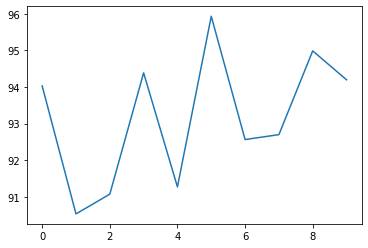

In [88]:
pd.Series(preds_ENB3).plot()
print('mean:',np.mean(preds_ENB3))